<a href="https://colab.research.google.com/github/abdalrahmenyousifMohamed/ML/blob/main/Time_Series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# OverView about **Dataset**

In [42]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

df = pd.read_csv("Index2018.csv")

In [43]:
df.head()

,date,spx,dax,ftse,nikkei
0,07/01/1994,469.90,2224.95,3445.98,18124.01
1,10/01/1994,475.27,2225.00,3440.58,18443.44
2,11/01/1994,474.13,2228.10,3413.77,18485.25
3,12/01/1994,474.17,2182.06,3372.02,18793.88
4,13/01/1994,472.47,2142.37,3360.01,18577.26


# Statistics methods

In [44]:
df.describe()

,spx,dax,ftse,nikkei
count,6269.000000,6269.000000,6269.000000,6269.000000
mean,1288.127542,6080.063363,5422.713545,14597.055700
std,487.586473,2754.361032,1145.572428,4043.122953
min,438.920000,1911.700000,2876.600000,7054.980000
25%,990.671905,4069.350000,4486.100000,10709.290000
50%,1233.420000,5773.340000,5662.430000,15028.170000
75%,1459.987747,7443.070000,6304.250000,17860.470000
max,2872.867839,13559.600000,7778.637689,24124.150000


In [45]:
df.value_counts()

date        spx          dax       ftse         nikkei  
01/01/1996  615.930000   2260.69   3689.300000  19868.15    1
21/03/2013  1545.802976  7932.51   6388.550000  12635.69    1
21/05/1996  672.760000   2564.12   3789.400000  22091.74    1
21/04/2017  2348.694958  12048.57  7114.549511  18620.75    1
21/04/2016  2091.483661  10435.73  6381.438719  17363.62    1
                                                           ..
11/03/1994  466.440000   2101.89   3191.900000  20115.31    1
11/02/2016  1829.078346  8752.87   5536.971555  15713.39    1
11/02/2015  2068.531977  10752.11  6818.171624  17652.68    1
11/02/2014  1819.747843  9478.77   6672.658012  14718.34    1
31/12/2015  2043.936863  10743.01  6242.320781  19033.71    1
Length: 6269, dtype: int64

# Check Null Values

In [46]:
df.isnull().sum()

date      0
spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Plotting The Data

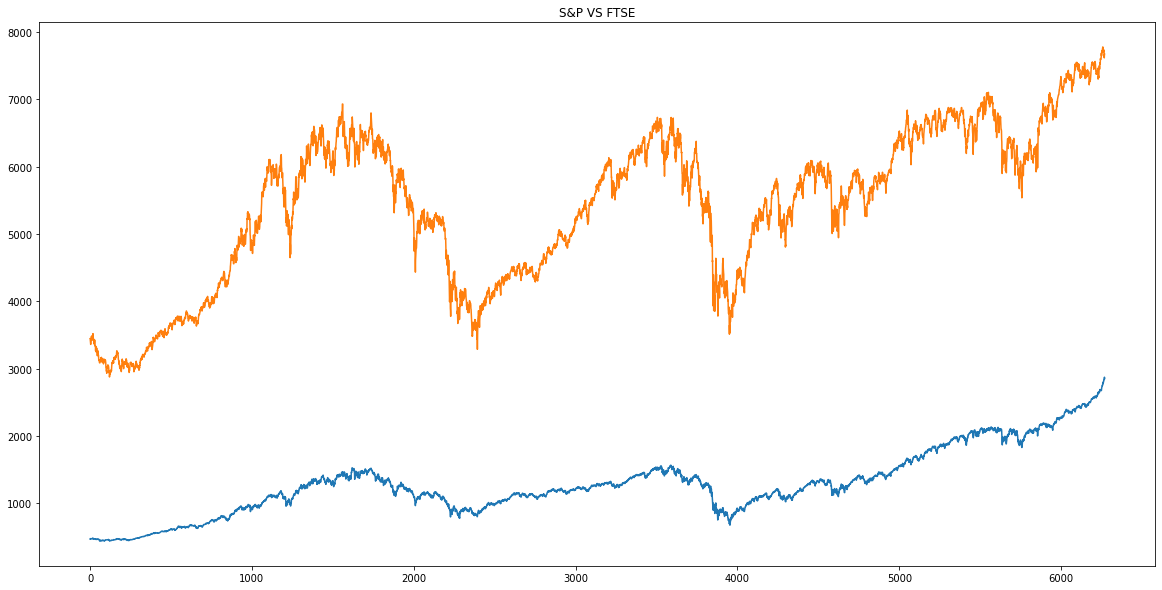

In [47]:
df.spx.plot(figsize=(20,10), title="S&P")
df.ftse.plot(figsize=(20,10) , title="FTSE")
plt.title("S&P VS FTSE")
plt.show()

We take a copy of the dataset because , we need to have the complete data load if we end up (removing) or altering data from the set

In [68]:
df_comp = df.copy()

# The QQ plot

In [49]:
import scipy.stats
import pylab

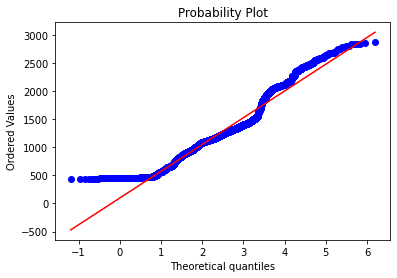

In [50]:
scipy.stats.probplot(df_comp.spx ,sparams=(2.5,), plot=pylab)
pylab.show()

1. Red Line : what data point should follow , if they are normally distributed

2. Theoretical quantiles : How many Standard Deviation is away from the mean these value are (in this case its not really the case since we have more values around 500 mark than we should)

# Length Of Time Period

we eant to analyze consecutive chunks of data and refer to the values assign to a specific day

All the "date" values are 1
Any single data holds a top value
the method randomly select one to display

In [69]:
df_comp.date.describe()

count           6269
unique          6269
top       07/01/1994
freq               1
Name: date, dtype: object

# From Text To date

we get more detailed statistics about time period

In [70]:
df_comp.date = pd.to_datetime(df_comp.date , dayfirst=True)

In [71]:
df_comp.head()

,date,spx,dax,ftse,nikkei
0,1994-01-07,469.90,2224.95,3445.98,18124.01
1,1994-01-10,475.27,2225.00,3440.58,18443.44
2,1994-01-11,474.13,2228.10,3413.77,18485.25
3,1994-01-12,474.17,2182.06,3372.02,18793.88
4,1994-01-13,472.47,2142.37,3360.01,18577.26


In [72]:
df_comp.date.describe()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  """Entry point for launching an IPython kernel.


count                    6269
unique                   6269
top       1994-01-07 00:00:00
freq                        1
first     1994-01-07 00:00:00
last      2018-01-29 00:00:00
Name: date, dtype: object

# Setting The index

In [73]:
df_comp.set_index("date" , inplace=True)
df_comp.head()

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.90,2224.95,3445.98,18124.01
1994-01-10,475.27,2225.00,3440.58,18443.44
1994-01-11,474.13,2228.10,3413.77,18485.25
1994-01-12,474.17,2182.06,3372.02,18793.88
1994-01-13,472.47,2142.37,3360.01,18577.26


**Once data becomes as index , we no longer save it values as seperate attributes in the data frame**

In [56]:
#df_comp.date.describe()

# Setting The Desired Frequency

In [74]:
df_comp = df_comp.asfreq('d')
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-08,NaN,NaN,NaN,NaN
1994-01-09,NaN,NaN,NaN,NaN
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
...,...,...,...,...
2018-01-25,2839.253031,13298.36,7615.839954,23669.49
2018-01-26,2872.867839,13340.17,7665.541292,23631.88
2018-01-27,NaN,NaN,NaN,NaN


Null values here represent the days was not recoded in dateset , and these days are Saturday , sunday , actually we generated new periods , which not have values associted with them.

# So , we better avoid adding such irrelevant time periods into our dataset

So ,  we use business days

In [75]:
df_comp = df_comp.asfreq('b')
df_comp

,spx,dax,ftse,nikkei
date,,,,
1994-01-07,469.900000,2224.95,3445.980000,18124.01
1994-01-10,475.270000,2225.00,3440.580000,18443.44
1994-01-11,474.130000,2228.10,3413.770000,18485.25
1994-01-12,474.170000,2182.06,3372.020000,18793.88
1994-01-13,472.470000,2142.37,3360.010000,18577.26
...,...,...,...,...
2018-01-23,2839.130362,13559.60,7731.827774,24124.15
2018-01-24,2837.544008,13414.74,7643.428966,23940.78
2018-01-25,2839.253031,13298.36,7615.839954,23669.49


# Handling Missing Values

Setting the frequency to " business day" must have generated 8 date.
for which we have no date avaliable

In [76]:
df_comp.isnull().sum()

spx       8
dax       8
ftse      8
nikkei    8
dtype: int64

There are underlying time variant patterns in the data , this approcha is appropriate only when data heavily fluctuate around the mean from the first to the last day

In [77]:
df_comp.spx=df_comp.spx.fillna(method="ffill")
df_comp.dax=df_comp.dax.fillna(method="bfill")
df_comp.ftse=df_comp.ftse.fillna(df.ftse.mean())
df_comp.nikkei=df_comp.nikkei.fillna(method="pad")

In [78]:
df_comp.isnull().sum()

spx       0
dax       0
ftse      0
nikkei    0
dtype: int64

# Handling surplus data

drop some columns in DataSet and work with one by one

In [81]:
df_comp["market_value"] = df_comp.spx
del df_comp['spx']
del df_comp['dax']
del df_comp['ftse']
del df_comp['nikkei']

# Splitting Data

Time Series data relies on keeping the chronological order of values

In [82]:
size = int(len(df_comp) * 0.8)
df_train = df_comp.iloc[:size]
df_test = df_comp.iloc[size:]

In [83]:
df_train.tail()

,market_value
date,
2013-04-01,1562.173837
2013-04-02,1570.252238
2013-04-03,1553.686978
2013-04-04,1559.979316
2013-04-05,1553.278930


In [84]:
df_test.head()

,market_value
date,
2013-04-08,1563.071269
2013-04-09,1568.607909
2013-04-10,1587.731827
2013-04-11,1593.369863
2013-04-12,1588.854623


**Note** missing 6 , 7 day cuz it saturday and sunday

# End Of Pre Processing

# White Noise

In [88]:
wn = np.random.normal(loc = df_train.market_value.mean() , scale = df_train.market_value.std() , size=len(df_train))


In [89]:
df_train['wn'] = wn

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


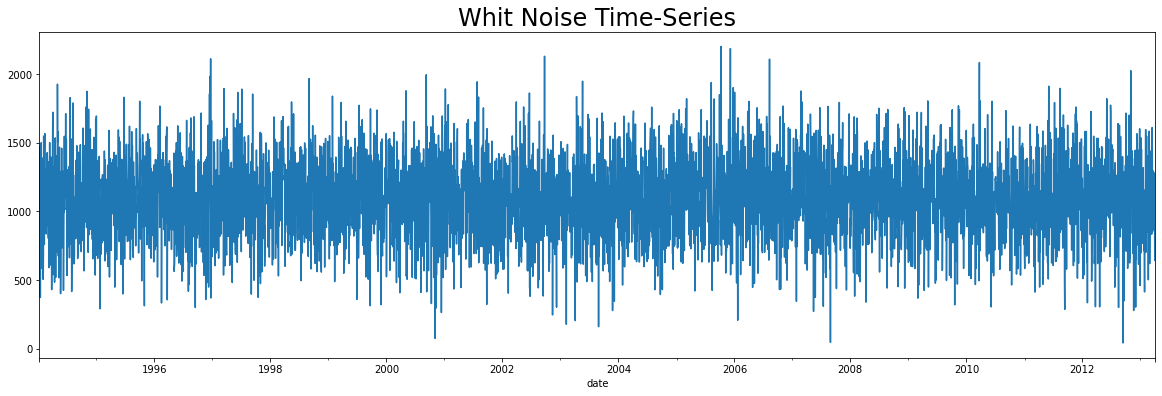

In [90]:
df_train.wn.plot(figsize=(20,6))
plt.title("Whit Noise Time-Series" , size=24)
plt.show()

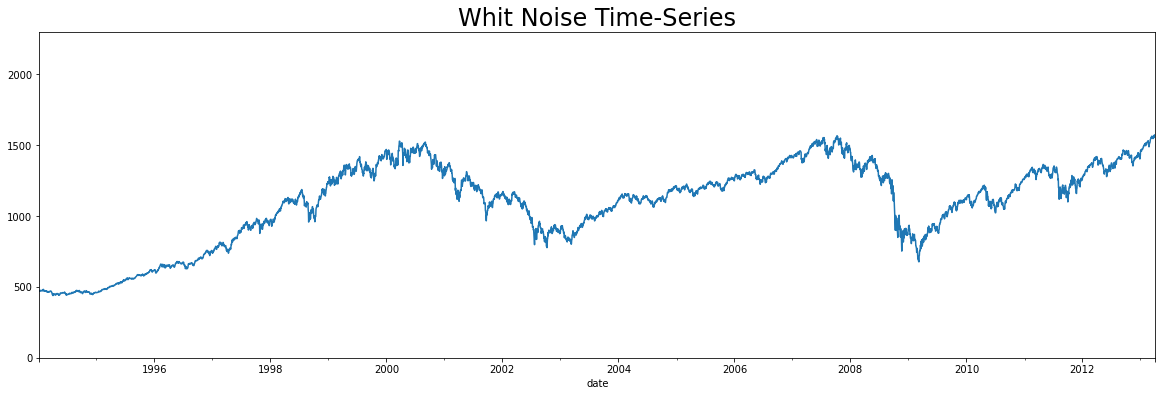

In [92]:
df_train.market_value.plot(figsize=(20,6))
plt.title("Whit Noise Time-Series" , size=24)
plt.ylim(0,2300)
plt.show()

# Random Walk

In [93]:
rw = pd.read_csv('RandWalk.csv')
rw.head()

,date,price
0,07/01/1994,1122.139662
1,08/01/1994,1135.238562
2,09/01/1994,1109.897831
3,10/01/1994,1080.347860
4,11/01/1994,1082.095245


In [94]:
rw.date = pd.to_datetime(rw.date , dayfirst=True)
rw.set_index('date' , inplace=True)
rw = rw.asfreq('b')

In [95]:
rw.describe()

,price
count,5021.000000
mean,1269.944293
std,444.216793
min,585.483034
25%,931.550429
50%,1156.363045
75%,1488.362029
max,2715.508720


In [96]:
df_train['rw'] = rw.price

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [98]:
df_train.head()

,market_value,wn,rw
date,,,
1994-01-07,469.90,982.488086,1122.139662
1994-01-10,475.27,1096.425924,1080.347860
1994-01-11,474.13,1470.199290,1082.095245
1994-01-12,474.17,1296.981947,1083.639265
1994-01-13,472.47,372.642492,1067.146255


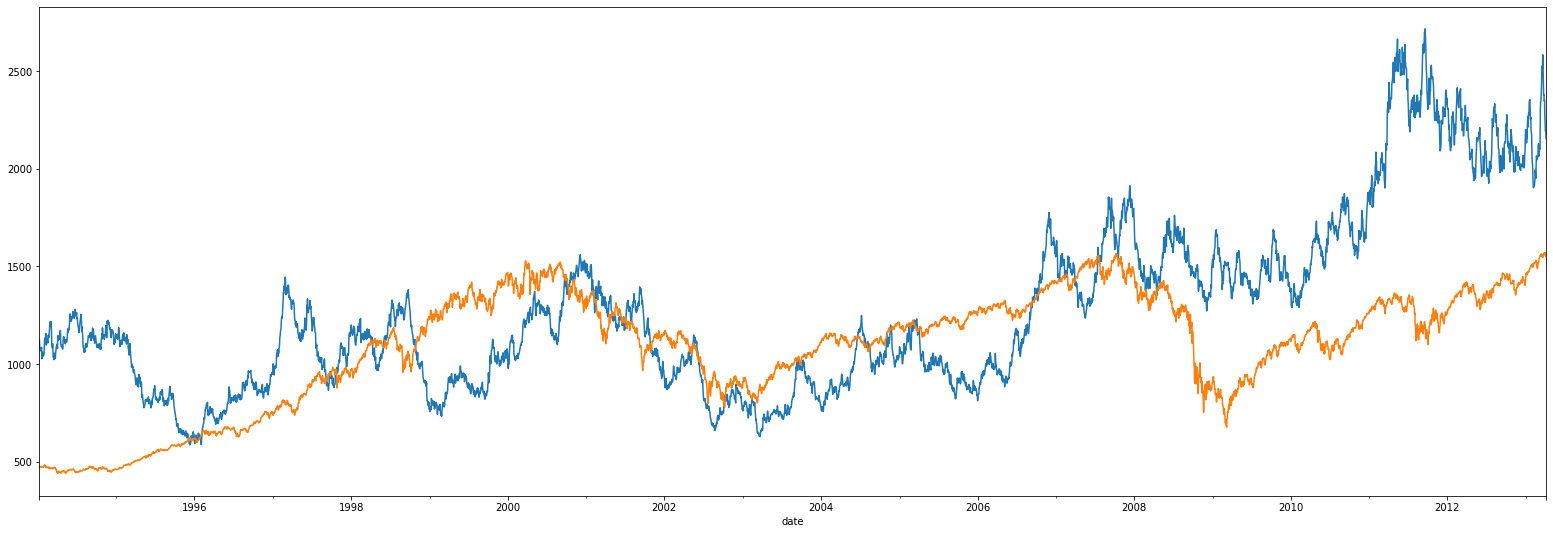

In [105]:
df_train.rw.plot(figsize=(27,9))
df_train.market_value.plot()
plt.show()

we can notice here that , small variation between consective time periods
2.  Cyclical increase and decrease in short period of Time